<center><h1> Covid19 Analysis and Prediction by Datampan</h1></center>

Author:
* Bimo Priyohutomo
* Muhammad Faris Umar Rahman
* Syahrul Apriansyah

Datasets: https://tiny.cc/Datacovidjakarta

# 0. Problem Statement

Penyakit coronavirus (COVID-19) adalah penyakit menular yang disebabkan oleh coronavirus yang baru ditemukan. Sebagian besar orang yang terinfeksi virus COVID-19 akan mengalami penyakit pernapasan ringan hingga sedang dan sembuh tanpa memerlukan perawatan khusus. Orang yang lebih tua, dan mereka yang memiliki masalah medis mendasar seperti penyakit kardiovaskular, diabetes, penyakit pernapasan kronis, dan kanker lebih mungkin mengembangkan penyakit serius.
Source -- [WHO](https://www.who.int/health-topics/coronavirus#tab=tab_1)

Sampai tanggal 1 Juli 2022, Indonesia telah melaporkan 6.090.509 kasus positif menempati peringkat pertama terbanyak di Asia Tenggara. Dalam hal angka kematian, Indonesia menempati peringkat ketiga terbanyak di Asia dengan 156.740 kematian. Oleh karena itu kami akan melakukan analisis dan prediksi terhadap kasus positif COVID-19 yang terjadi di Indonesia khusus di Provinsi DKI Jakarta untuk mendapatkan informasi dan insight terkini.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

**Import Dataset**

In [2]:
# read the data
dataset_ind_jkt = pd.read_excel("Dataset/Daily Update Data Agregat Covid-19 Jakarta editable.xlsx", sheet_name="Data Indonesia dan Jakarta")

In [3]:
dataset_ind_jkt.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,0,0,0,0,0
3,2020-03-03,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,...,0,0,0,0,1,0,0,2,3,2
4,2020-03-04,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset_vaksinasi = pd.read_excel("Dataset/Daily Update Data Agregat Covid-19 Jakarta editable.xlsx", sheet_name="Vaksinasi", skiprows=2, header=[0,1,2])
dataset_vaksinasi.head(1)

Tanggal              DKI                                       \
  Unnamed: 0_level_1 Tenaga Kesehatan                                        
  Unnamed: 0_level_2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1   
0         2021-03-05           112301      141425       91078     1.259339   

                                                                      ...  \
                         Lansia                                       ...   
  Persentase 2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1  ...   
0     0.811017           911631       76451           0     0.083862  ...   

                      Indonesia                                         \
  Total 12 - 17 Tahun Indonesia              Proposi Vaksin Jakarta D1   
                   Persentase 1 Persentase 2       Unnamed: 80_level_2   
0                           NaN          NaN                       NaN   

                            Vaksin Gotong Royong                          \
  Proposi Vaksin Jakarta D2              Jakarta               Indonesia   
        Unnamed: 81_level_2          Vaksinasi 1 Vaksinasi 2 Vaksinasi 1   
0                       NaN                    0           0         0.0   

              Vaksinasi 3 Jakarta                  
                 Tenaga Kesehatan Masyarakat Umum  
  Vaksinasi 2         Vaksinasi 3     Vaksinasi 3  
0         0.0                 NaN             NaN  

[1 rows x 88 columns]

Karena heading dari dataset di atas masih tidak sama dengan yang diharapkan, maka kita akan mengubahnya agar sesuai.

In [5]:
dataset_vaksinasi.columns = [f'{i}_{j}_{k}' for i, j, k in dataset_vaksinasi.columns]
dataset_vaksinasi.columns.values[0] = "Tanggal"
dataset_vaksinasi.head()

,Tanggal,DKI_Tenaga Kesehatan_Target Vaksinasi,DKI_Tenaga Kesehatan_Vaksinasi 1,DKI_Tenaga Kesehatan_Vaksinasi 2,DKI_Tenaga Kesehatan_Persentase 1,DKI_Tenaga Kesehatan_Persentase 2,DKI_Lansia_Target Vaksinasi,DKI_Lansia_Vaksinasi 1,DKI_Lansia_Vaksinasi 2,DKI_Lansia_Persentase 1,...,Indonesia_Total 12 - 17 Tahun Indonesia_Persentase 1,Indonesia_Total 12 - 17 Tahun Indonesia_Persentase 2,Indonesia_Proposi Vaksin Jakarta D1_Unnamed: 80_level_2,Indonesia_Proposi Vaksin Jakarta D2_Unnamed: 81_level_2,Vaksin Gotong Royong_Jakarta_Vaksinasi 1,Vaksin Gotong Royong_Jakarta_Vaksinasi 2,Vaksin Gotong Royong_Indonesia_Vaksinasi 1,Vaksin Gotong Royong_Indonesia_Vaksinasi 2,Vaksinasi 3 Jakarta_Tenaga Kesehatan_Vaksinasi 3,Vaksinasi 3 Jakarta_Masyarakat Umum_Vaksinasi 3
0,2021-03-05,112301,141425,91078,1.259339,0.811017,911631,76451,0,0.083862,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,NaN
1,2021-03-06,112301,144046,91379,1.282678,0.813697,911631,79421,0,0.087120,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,NaN
2,2021-03-07,112301,177126,91460,1.577243,0.814418,911631,83628,0,0.091734,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,NaN
3,2021-03-08,112301,181237,92988,1.613850,0.828025,911631,95140,1,0.104362,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,NaN
4,2021-03-09,112301,113326,89984,1.009127,0.801275,911631,135128,675,0.148227,...,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,NaN


# 1. Data Cleaning and Preprocessing

Pada tahap ini kita akan melakukan penghapusan atau penghilangan data-data yang tidak lengkap, tidak relevan, dan tidak akurat. Dengan melakukan tahap ini, kita akan menghindari kesalahpahaman ketika menganalisis data tersebut.

In [6]:
dataset_ind_jkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          855 non-null    datetime64[ns]
 1   Positif (Indonesia)              854 non-null    float64       
 2   Dirawat (Indonesia)              854 non-null    float64       
 3   Sembuh (Indonesia)               854 non-null    float64       
 4   Meninggal (Indonesia)            854 non-null    float64       
 5   Meninggal (Jakarta)              854 non-null    float64       
 6   Sembuh (Jakarta)                 854 non-null    float64       
 7   Self-Isolation (Jakarta)         854 non-null    float64       
 8   Dirawat (Jakarta)                854 non-null    float64       
 9   Positif (Jakarta)                854 non-null    float64       
 10  Positif Aktif (Jakarta)          854 non-null    float64      

In [7]:
dataset_vaksinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 88 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Tanggal                                                   485 non-null    datetime64[ns]
 1   DKI_Tenaga Kesehatan_Target Vaksinasi                     485 non-null    int64         
 2   DKI_Tenaga Kesehatan_Vaksinasi 1                          485 non-null    int64         
 3   DKI_Tenaga Kesehatan_Vaksinasi 2                          485 non-null    int64         
 4   DKI_Tenaga Kesehatan_Persentase 1                         485 non-null    float64       
 5   DKI_Tenaga Kesehatan_Persentase 2                         485 non-null    float64       
 6   DKI_Lansia_Target Vaksinasi                               485 non-null    int64         
 7   DKI_Lansia_Vaksinasi 1                      

Pertama-tama kita akan mengecek apakah terdapat data yang kosong atau tidak dalam dataset kita.

In [8]:
# dataset indonesia dan jakarta
dataset_ind_jkt.isnull().sum().sort_values(ascending=False)

Positif Aktif (Jakarta)            1
Dirawat (Indonesia)                1
Sembuh (Indonesia)                 1
Meninggal (Indonesia)              1
Meninggal (Jakarta)                1
Sembuh (Jakarta)                   1
Self-Isolation (Jakarta)           1
Dirawat (Jakarta)                  1
Positif (Jakarta)                  1
Positif (Indonesia)                1
Meninggal Harian (Jakarta)         0
Positif Harian (Jakarta)           0
Dirawat Harian (Jakarta)           0
Self-Isolation Harian (Jakarta)    0
Sembuh Harian (Jakarta)            0
Tanggal                            0
Meninggal Harian (Indonesia)       0
Sembuh Harian (Indonesia)          0
Dirawat Harian (Indonesia)         0
Positif Harian (Indonesia)         0
Positif Aktif Harian (Jakarta)     0
dtype: int64

In [9]:
# dataset vaksinasi
dataset_vaksinasi.isnull().sum().sort_values(ascending=False)

Vaksin Gotong Royong_Indonesia_Vaksinasi 1              409
Vaksin Gotong Royong_Indonesia_Vaksinasi 2              389
Vaksinasi 3 Jakarta_Masyarakat Umum_Vaksinasi 3         315
Vaksinasi 3 Jakarta_Tenaga Kesehatan_Vaksinasi 3        315
DKI_Total  6 - 11 Tahun DKI Jakarta_Target Vaksinasi    290
                                                       ... 
Indonesia_Lansia_Vaksinasi 1                              0
Indonesia_Lansia_Vaksinasi 2                              0
Indonesia_Lansia_Persentase 1                             0
Indonesia_Lansia_Persentase 2                             0
Tanggal                                                   0
Length: 88, dtype: int64

Dapat dilihat bahwa dalam dataset pertama terdapat missing value. Karena jumlah missing value-nya hanya sedikit maka kita akan menghapusnya. Sedangkan dalam dataset kedua memang terdapat banyak data yang kosong namun hal itu disebabkan karena beberapa kolom memang belum ada pada awal pengambilan data dan baru ada pada suatu waktu setelah dilakukan pengambilan data secara berkala.

In [10]:
dataset_ind_jkt.dropna(inplace=True)

In [11]:
dataset_ind_jkt.isnull().sum().sort_values(ascending=False)

Tanggal                            0
Positif Harian (Indonesia)         0
Positif Harian (Jakarta)           0
Dirawat Harian (Jakarta)           0
Self-Isolation Harian (Jakarta)    0
Sembuh Harian (Jakarta)            0
Meninggal Harian (Jakarta)         0
Meninggal Harian (Indonesia)       0
Sembuh Harian (Indonesia)          0
Dirawat Harian (Indonesia)         0
Positif Aktif (Jakarta)            0
Positif (Indonesia)                0
Positif (Jakarta)                  0
Dirawat (Jakarta)                  0
Self-Isolation (Jakarta)           0
Sembuh (Jakarta)                   0
Meninggal (Jakarta)                0
Meninggal (Indonesia)              0
Sembuh (Indonesia)                 0
Dirawat (Indonesia)                0
Positif Aktif Harian (Jakarta)     0
dtype: int64

Selanjutnya kita juga akan mengecek apakah terdapat data yang duplikat atau tidak dalam dataset kita.

In [12]:
duplicateRows = dataset_ind_jkt[dataset_ind_jkt.duplicated()]
duplicateRows.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)


In [13]:
duplicateRows = dataset_vaksinasi[dataset_vaksinasi.duplicated()]
duplicateRows.head()

,Tanggal,DKI_Tenaga Kesehatan_Target Vaksinasi,DKI_Tenaga Kesehatan_Vaksinasi 1,DKI_Tenaga Kesehatan_Vaksinasi 2,DKI_Tenaga Kesehatan_Persentase 1,DKI_Tenaga Kesehatan_Persentase 2,DKI_Lansia_Target Vaksinasi,DKI_Lansia_Vaksinasi 1,DKI_Lansia_Vaksinasi 2,DKI_Lansia_Persentase 1,...,Indonesia_Total 12 - 17 Tahun Indonesia_Persentase 1,Indonesia_Total 12 - 17 Tahun Indonesia_Persentase 2,Indonesia_Proposi Vaksin Jakarta D1_Unnamed: 80_level_2,Indonesia_Proposi Vaksin Jakarta D2_Unnamed: 81_level_2,Vaksin Gotong Royong_Jakarta_Vaksinasi 1,Vaksin Gotong Royong_Jakarta_Vaksinasi 2,Vaksin Gotong Royong_Indonesia_Vaksinasi 1,Vaksin Gotong Royong_Indonesia_Vaksinasi 2,Vaksinasi 3 Jakarta_Tenaga Kesehatan_Vaksinasi 3,Vaksinasi 3 Jakarta_Masyarakat Umum_Vaksinasi 3


Karena dalam kedua dataset tidak terdapat duplikat data maka kita tidak perlu melakukan apa pun.

**Pembuangan Beberapa Kolom**

Karena kolom yang terdapat pada dataset vaksinasi sangat banyak dan tidak semua akan kita analisis maka selanjutnya kita akan menghapus kolom-kolom tersebut dari dataset kita.

In [14]:
dataset_vaksinasi.columns.values

array(['Tanggal', 'DKI_Tenaga Kesehatan_Target Vaksinasi',
       'DKI_Tenaga Kesehatan_Vaksinasi 1',
       'DKI_Tenaga Kesehatan_Vaksinasi 2',
       'DKI_Tenaga Kesehatan_Persentase 1',
       'DKI_Tenaga Kesehatan_Persentase 2', 'DKI_Lansia_Target Vaksinasi',
       'DKI_Lansia_Vaksinasi 1', 'DKI_Lansia_Vaksinasi 2',
       'DKI_Lansia_Persentase 1', 'DKI_Lansia_Persentase 2',
       'DKI_Pelayan Publik_Target Vaksinasi',
       'DKI_Pelayan Publik_Vaksinasi 1', 'DKI_Pelayan Publik_Vaksinasi 2',
       'DKI_Pelayan Publik_Persentase 1',
       'DKI_Pelayan Publik_Persentase 2',
       'DKI_Total DKI Jakarta_Target Vaksinasi',
       'DKI_Total DKI Jakarta_Vaksinasi 1',
       'DKI_Total DKI Jakarta_Vaksinasi 2',
       'DKI_Total DKI Jakarta_Persentase 1',
       'DKI_Total DKI Jakarta_Persentase 2',
       'DKI_Vaksinasi Harian_Vaksinasi 1',
       'DKI_Vaksinasi Harian_Vaksinasi 2',
       'DKI_Total 18 - 59 Tahun DKI Jakarta_Target Vaksinasi',
       'DKI_Total 18 - 59 Tahun DKI

Kolom dengan indeks 38-47 dan 80-85  merupakan kolom yang tidak akan kita analisis sehingga kita akan menghapusnya.

In [15]:
deleted_columns = np.hstack((np.arange(38,48), np.arange(80,86)))
deleted_columns

array([38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 80, 81, 82, 83, 84, 85])

In [16]:
dataset_vaksinasi.drop(dataset_vaksinasi.columns[deleted_columns], axis=1, inplace=True)
dataset_vaksinasi.columns.values

array(['Tanggal', 'DKI_Tenaga Kesehatan_Target Vaksinasi',
       'DKI_Tenaga Kesehatan_Vaksinasi 1',
       'DKI_Tenaga Kesehatan_Vaksinasi 2',
       'DKI_Tenaga Kesehatan_Persentase 1',
       'DKI_Tenaga Kesehatan_Persentase 2', 'DKI_Lansia_Target Vaksinasi',
       'DKI_Lansia_Vaksinasi 1', 'DKI_Lansia_Vaksinasi 2',
       'DKI_Lansia_Persentase 1', 'DKI_Lansia_Persentase 2',
       'DKI_Pelayan Publik_Target Vaksinasi',
       'DKI_Pelayan Publik_Vaksinasi 1', 'DKI_Pelayan Publik_Vaksinasi 2',
       'DKI_Pelayan Publik_Persentase 1',
       'DKI_Pelayan Publik_Persentase 2',
       'DKI_Total DKI Jakarta_Target Vaksinasi',
       'DKI_Total DKI Jakarta_Vaksinasi 1',
       'DKI_Total DKI Jakarta_Vaksinasi 2',
       'DKI_Total DKI Jakarta_Persentase 1',
       'DKI_Total DKI Jakarta_Persentase 2',
       'DKI_Vaksinasi Harian_Vaksinasi 1',
       'DKI_Vaksinasi Harian_Vaksinasi 2',
       'DKI_Total 18 - 59 Tahun DKI Jakarta_Target Vaksinasi',
       'DKI_Total 18 - 59 Tahun DKI

# 2. Exploratory Data Analysis

## 2.1 Proporsi Kasus Covid-19 di Indonesia

In [17]:
total_pos_ind = dataset_ind_jkt["Positif (Indonesia)"].iloc[-1]
total_rawat_ind = dataset_ind_jkt["Dirawat (Indonesia)"].iloc[-1]
total_sembuh_ind = dataset_ind_jkt["Sembuh (Indonesia)"].iloc[-1]
total_meninggal_ind = dataset_ind_jkt["Meninggal (Indonesia)"].iloc[-1]


labels = ['Positif', 'Positif Aktif', 'Sembuh', 'Meninggal']
jumlah  = [total_pos_ind, total_rawat_ind, total_sembuh_ind, total_meninggal_ind]
persentase = [round(i/total_pos_ind*100, 2) for i in jumlah]
proporsi_covid_ind = pd.DataFrame({"": labels, "Jumlah": jumlah, "Persentase": persentase})
proporsi_covid_ind

,,Jumlah,Persentase
0,Positif,6090509.0,100.00
1,Positif Aktif,16915.0,0.28
2,Sembuh,5916854.0,97.15
3,Meninggal,156740.0,2.57


Dapat dilihat per 1 juli 2022 terdapat total 6 juta kasus covid-19 di Indonesia, namun 97% dari kasus tersebut sudah dinyatakan sembuh dan hanya 16 ribu kasus positif aktif yang ada saat ini.

In [18]:
total_pos_jkt = dataset_ind_jkt["Positif (Jakarta)"].iloc[-1]
total_rawat_jkt = dataset_ind_jkt["Positif Aktif (Jakarta)"].iloc[-1]
total_sembuh_jkt = dataset_ind_jkt["Sembuh (Jakarta)"].iloc[-1]
total_meninggal_jkt = dataset_ind_jkt["Meninggal (Jakarta)"].iloc[-1]

label = ['Positif', 'Positif Aktif', 'Sembuh', 'Meninggal']
jumlah = [total_pos_jkt, total_rawat_jkt, total_sembuh_jkt, total_meninggal_jkt]
persentase = [round(i/total_pos_jkt*100, 2) for i in jumlah]
proporsi_covid_jkt = pd.DataFrame({"": label, "Jumlah": jumlah, "Persentase": persentase})
print(proporsi_covid_jkt)
print("\nPersentase kasus posisif aktif di jakarta adalah {}%".format(round(total_rawat_jkt/total_rawat_ind*100, 2)))

                     Jumlah  Persentase
0        Positif  1270841.0      100.00
1  Positif Aktif     9545.0        0.75
2         Sembuh  1245980.0       98.04
3      Meninggal    15316.0        1.21

Persentase kasus posisif aktif di jakarta adalah 56.43%


Berdasarkan tabel di atas kasus covid-19 di Indonesia dan Jakarta per 1 juli 2022 tidak menunjukkan perbedaan yang signifikan. Sementara persentase kasus positif aktif di Jakarta adalah 56% dari total kasus positif aktif di Indonesia.

## 2.2 Tren Positif Covid-19 di Indonesia

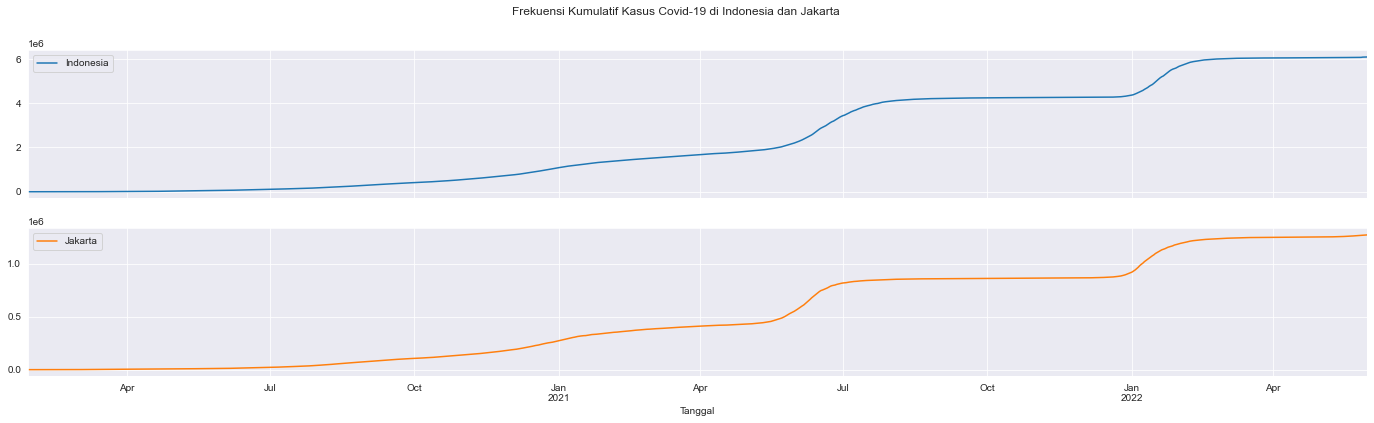

In [19]:
date = pd.date_range('29/1/2020', periods=len(dataset_ind_jkt["Tanggal"]), freq='D')
df = pd.DataFrame({"Tanggal": date ,"Indonesia": dataset_ind_jkt["Positif (Indonesia)"], "Jakarta": dataset_ind_jkt["Positif (Jakarta)"]},)


df.plot(x="Tanggal", y=["Indonesia", "Jakarta"], figsize=(24,6), subplots=True, title = "Frekuensi Kumulatif Kasus Covid-19 di Indonesia dan Jakarta")
plt.rcParams.update({'font.size': 17})
plt.show()

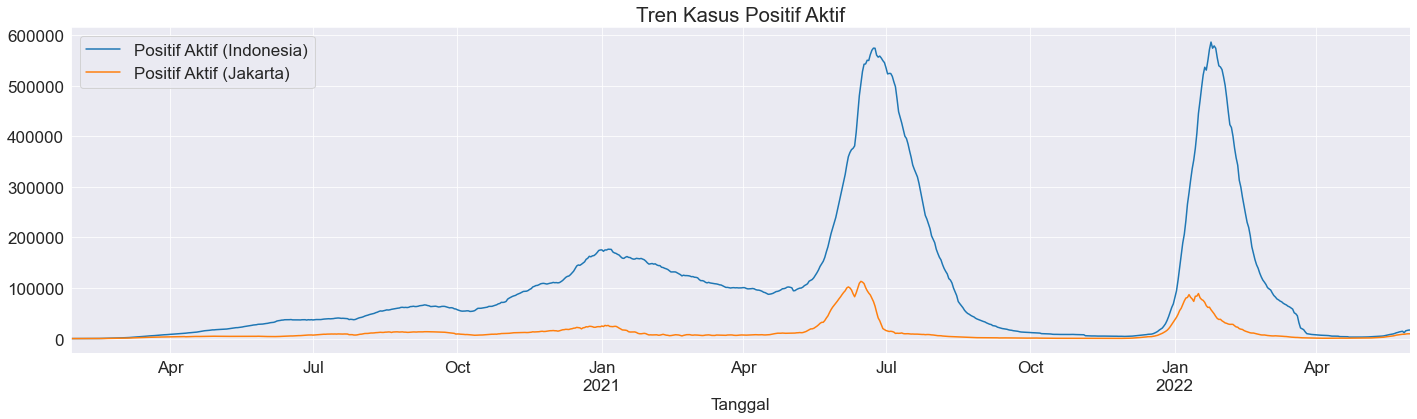

In [20]:
date = pd.date_range('29/1/2020', periods=len(dataset_ind_jkt["Tanggal"]), freq='D')
df = pd.DataFrame({"Tanggal": date ,"Dirawat (Indonesia)": dataset_ind_jkt["Dirawat (Indonesia)"], "Positif Aktif (Jakarta)": dataset_ind_jkt["Positif Aktif (Jakarta)"]},)

df.plot(x="Tanggal", y=["Dirawat (Indonesia)", "Positif Aktif (Jakarta)"], figsize=(24,6))
plt.legend(["Positif Aktif (Indonesia)", "Positif Aktif (Jakarta)"])
title = "Tren Kasus Positif Aktif"
plt.title(title)
plt.rcParams.update({'font.size': 17})
plt.show()

Berdasarkan grafik di atas kita dapat mengetahui bahwa pada pertangahan tahun 2021 dan awal tahun 2022 terdapat lonjakan kasus positif aktif yang sangat tinggi di Indonesia begitu pula di Jakarta.


Selenjutnya kita akan mencari tahu bagaimana tren dari kematian covid-19 di Indonesia dan Jakarta.

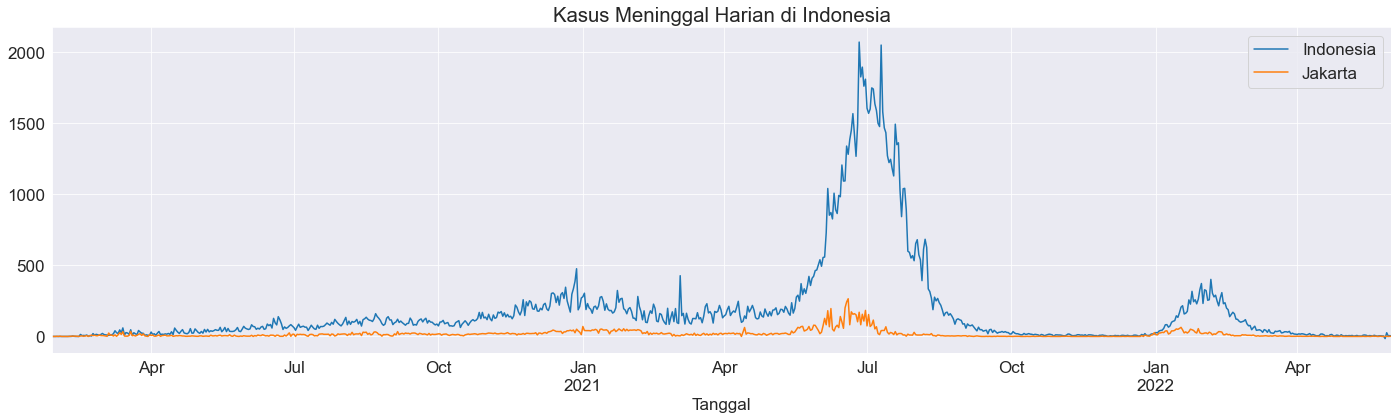

In [21]:
date = pd.date_range('29/1/2020', periods=len(dataset_ind_jkt["Tanggal"]), freq='D')
df = pd.DataFrame({"Tanggal": date ,"Meninggal Harian (Indonesia)": dataset_ind_jkt["Meninggal Harian (Indonesia)"], "Meninggal Harian (Jakarta)": dataset_ind_jkt["Meninggal Harian (Jakarta)"]},)

df.plot(x="Tanggal", y=["Meninggal Harian (Indonesia)", "Meninggal Harian (Jakarta)"], figsize=(24,6))
plt.legend(["Indonesia", "Jakarta"])
title = "Kasus Meninggal Harian di Indonesia"
plt.title(title)
plt.rcParams.update({'font.size': 17})
plt.show()

Berdasarkan grafik di atas kasus kematian tertinggi di Indonesia dan Jakarta terjadi pada pertengahan tahun 2021, hal ini wajar saja karena pada waktu tersebut juga terjadi lonjakan kasus positif covid-19 yang begitu tinggi. Namun, walau begitu, kasus kematian pada awal tahun 2022 tidak setinggi kasus kematian pada pertengahan tahun 2021 padahal pada kedua waktu tersebut terjadi lonjakan covid-19 dengan jumlah yang hampir sama.

Kami berasumsi bahwa hal ini dapat terjadi karena dengan seiring waktu banyak warga Indonesia yang mendapatkan vaksinasi sehingga menurunkan mortality rate.

## 2.3 Vaksinasi

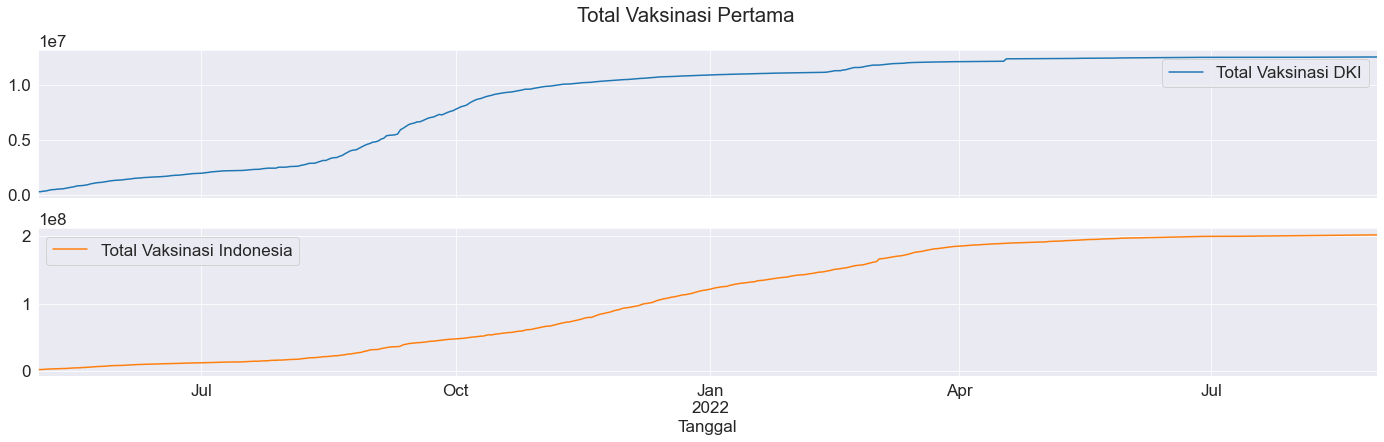

In [22]:
date = pd.date_range('05/03/2021', periods=len(dataset_vaksinasi["Tanggal"]), freq='D')
df = pd.DataFrame({"Tanggal": date ,"Total Vaksinasi DKI": dataset_vaksinasi["DKI_Total DKI Jakarta_Vaksinasi 1"], "Total Vaksinasi Indonesia": dataset_vaksinasi["Indonesia_Total Indonesia_Vaksinasi 1"]},)

df.plot(x="Tanggal", y=["Total Vaksinasi DKI", "Total Vaksinasi Indonesia"], figsize=(24,6), subplots=True, title="Total Vaksinasi Pertama")
plt.rcParams.update({'font.size': 17})
plt.show()

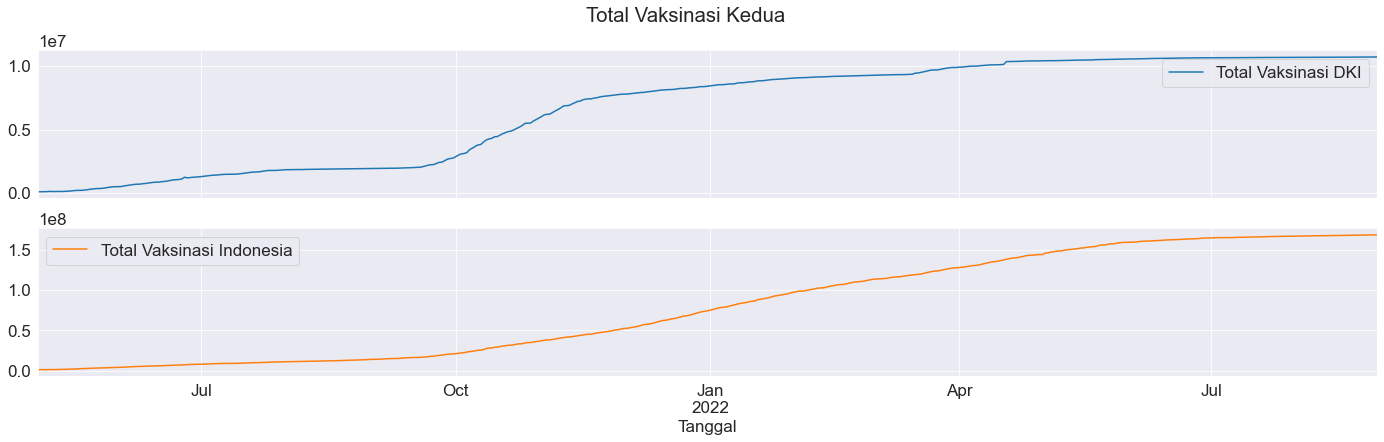

In [23]:
date = pd.date_range('05/03/2021', periods=len(dataset_vaksinasi["Tanggal"]), freq='D')
df = pd.DataFrame({"Tanggal": date ,"Total Vaksinasi DKI": dataset_vaksinasi["DKI_Total DKI Jakarta_Vaksinasi 2"], "Total Vaksinasi Indonesia": dataset_vaksinasi["Indonesia_Total Indonesia_Vaksinasi 2"]},)

df.plot(x="Tanggal", y=["Total Vaksinasi DKI", "Total Vaksinasi Indonesia"], figsize=(24,6), subplots=True, title="Total Vaksinasi Kedua")
plt.rcParams.update({'font.size': 17})
plt.show()

Seperti asumsi kami sebelumnya, kasus kematian pada awal tahun 2022 lebih rendah dari kasus kematian pada pertengahan tahun 2021 mungkin disebabkan karena banyaknya warga Indonesia yang mendapatkan vaksinasi, hal ini diperkuat dengan tampilan grafik di atas yang menunjukkan bahwa pada awal tahun 2022 banyak warga Indonesia yang mendapatkan vaksinasi.

Lalu bagaimana dengan tren vaksin di masyarakat? apakah banyak warga yang enggan untuk mendapatkan vaksin?

C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3397: UserWarning: Parsing '18/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


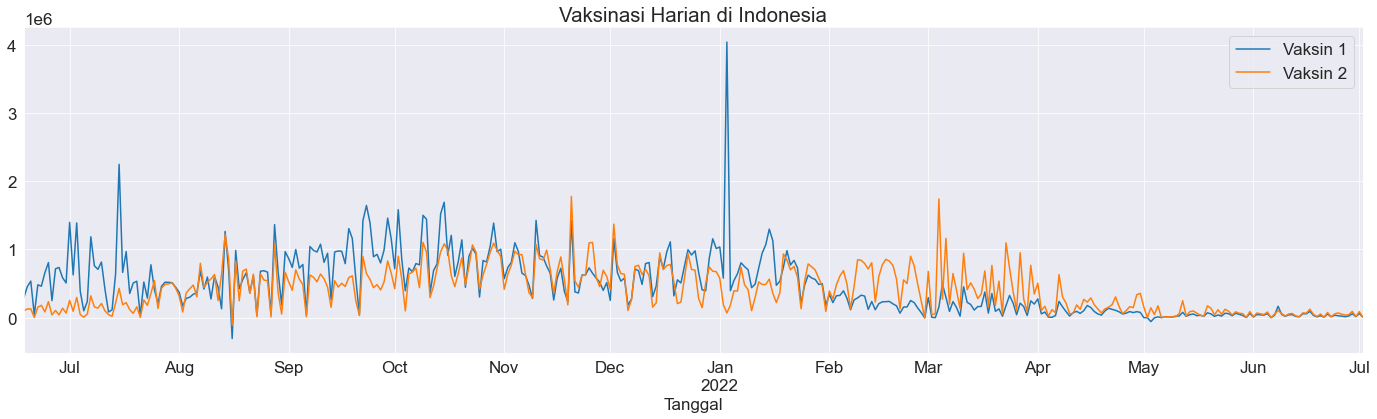

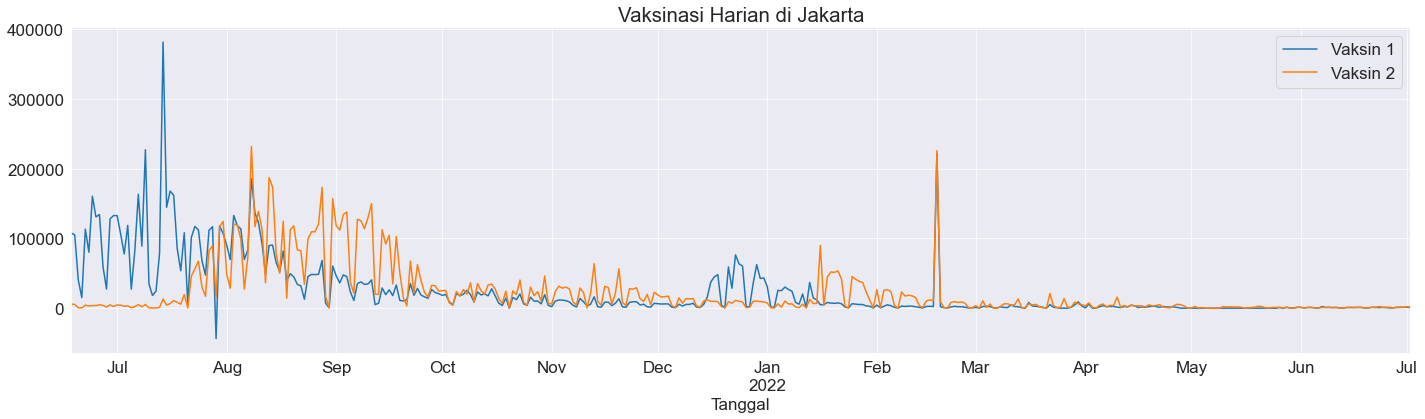

In [24]:
date = pd.date_range('18/06/2021', periods=len(dataset_vaksinasi["Tanggal"].iloc[105:]), freq='D')
df = pd.DataFrame({"Tanggal": date ,"Vaksin 1": dataset_vaksinasi["Indonesia_Vaksinasi Harian_Vaksinasi 1"].iloc[-len(date):], "Vaksin 2": dataset_vaksinasi["Indonesia_Vaksinasi Harian_Vaksinasi 2"].iloc[-len(date):]},)

df.plot(x="Tanggal", y=["Vaksin 1", "Vaksin 2"], figsize=(24,6))
title = "Vaksinasi Harian di Indonesia"
plt.title(title)
plt.rcParams.update({'font.size': 17})
plt.show()

df = pd.DataFrame({"Tanggal": date ,"Vaksin 1": dataset_vaksinasi["DKI_Vaksinasi Harian_Vaksinasi 1"].iloc[-len(date):], "Vaksin 2": dataset_vaksinasi["DKI_Vaksinasi Harian_Vaksinasi 2"].iloc[-len(date):]},)

df.plot(x="Tanggal", y=["Vaksin 1", "Vaksin 2"], figsize=(24,6))
title = "Vaksinasi Harian di Jakarta"
plt.title(title)
plt.rcParams.update({'font.size': 17})
plt.show()

Terlihat bahwa angka vaksinasi harian bersifat fluktuatif, hal ini mungkin disebabkan karena banyak isu yang beredar di masyarakat mengenai vaksin itu sendiri

                     Jumlah  Persentase
0   6 - 11 Tahun   836979.0         7.1
1  12 - 17 Tahun  1377790.0        11.7
2  18 - 59 Tahun  9543690.0        81.2


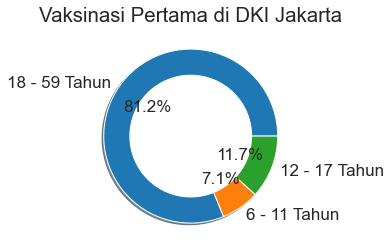

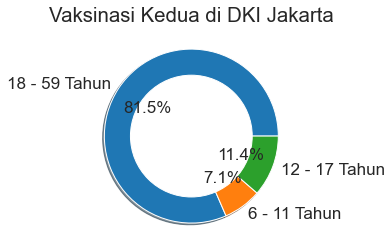

In [25]:
vaksin1_DKI_18_59 = dataset_vaksinasi["DKI_Total 18 - 59 Tahun DKI Jakarta_Vaksinasi 1"].iloc[-1]
vaksin1_DKI_6_11 = dataset_vaksinasi["DKI_Total  6 - 11 Tahun DKI Jakarta_Vaksinasi 1"].iloc[-1]
vaksin1_DKI_12_17 = dataset_vaksinasi["DKI_Total 12 - 17 Tahun DKI Jakarta_Vaksinasi 1"].iloc[-1]
total = vaksin1_DKI_18_59 + vaksin1_DKI_6_11 + vaksin1_DKI_12_17

labels = ["6 - 11 Tahun", "12 - 17 Tahun", "18 - 59 Tahun"]
jumlah  = [vaksin1_DKI_6_11, vaksin1_DKI_12_17, vaksin1_DKI_18_59]
persentase = [round(i/total*100, 1) for i in jumlah]
tabel = pd.DataFrame({"": labels, "Jumlah": jumlah, "Persentase": persentase})
print(tabel)

plt.pie([vaksin1_DKI_18_59, vaksin1_DKI_6_11, vaksin1_DKI_12_17], labels=["18 - 59 Tahun", "6 - 11 Tahun", "12 - 17 Tahun"], autopct='%1.1f%%', shadow=True)
plt.title("Vaksinasi Pertama di DKI Jakarta")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

vaksin2_DKI_18_59 = dataset_vaksinasi["DKI_Total 18 - 59 Tahun DKI Jakarta_Vaksinasi 2"].iloc[-1]
vaksin2_DKI_6_11 = dataset_vaksinasi["DKI_Total  6 - 11 Tahun DKI Jakarta_Vaksinasi 2"].iloc[-1]
vaksin2_DKI_12_17 = dataset_vaksinasi["DKI_Total 12 - 17 Tahun DKI Jakarta_Vaksinasi 2"].iloc[-1]

plt.pie([vaksin2_DKI_18_59, vaksin2_DKI_6_11, vaksin2_DKI_12_17], labels=["18 - 59 Tahun", "6 - 11 Tahun", "12 - 17 Tahun"], autopct='%1.1f%%', shadow=True)
plt.title("Vaksinasi Kedua di DKI Jakarta")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Berdasarkan diagram di atas, kita dapat mengetahui bahwa orang yang mendapatkan vaksin di DKI Jakarta didominasi oleh orang yang berusia 18 - 59 tahun.

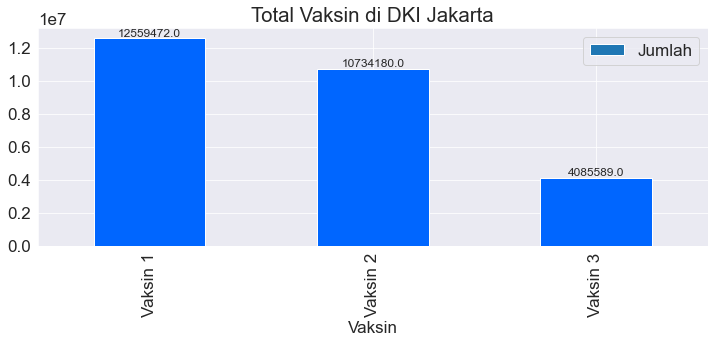

In [26]:
total_vaksin1_DKI = dataset_vaksinasi["DKI_Total DKI Jakarta_Vaksinasi 1"].iloc[-1]
total_vaksin2_DKI = dataset_vaksinasi["DKI_Total DKI Jakarta_Vaksinasi 2"].iloc[-1]
total_vaksin3_DKI = dataset_vaksinasi["Vaksinasi 3 Jakarta_Masyarakat Umum_Vaksinasi 3"].iloc[-1] +  dataset_vaksinasi["Vaksinasi 3 Jakarta_Tenaga Kesehatan_Vaksinasi 3"].iloc[-1]

# create bar plot
labels = ["Vaksin 1", "Vaksin 2", "Vaksin 3"]
jumlah  = [total_vaksin1_DKI, total_vaksin2_DKI, total_vaksin3_DKI]
df = pd.DataFrame({"Vaksin": labels, "Jumlah": jumlah})
df.plot(x="Vaksin", y="Jumlah", kind="bar", figsize=(12,4))
plt.title("Total Vaksin di DKI Jakarta")
plt.rcParams.update({'font.size': 12})

bars = plt.bar(df["Vaksin"], df["Jumlah"], color="#0066ff", width=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

# 3. Modelling

In [27]:
dataset = pd.DataFrame({"Positif" : dataset_ind_jkt["Positif (Indonesia)"].values}, index=dataset_ind_jkt["Tanggal"])
dataset

,Positif
Tanggal,
2020-01-29,0.0
2020-03-01,0.0
2020-03-02,2.0
2020-03-03,2.0
2020-03-04,2.0
...,...
2022-06-27,6072918.0
2022-06-28,6084063.0
2022-06-29,6086212.0


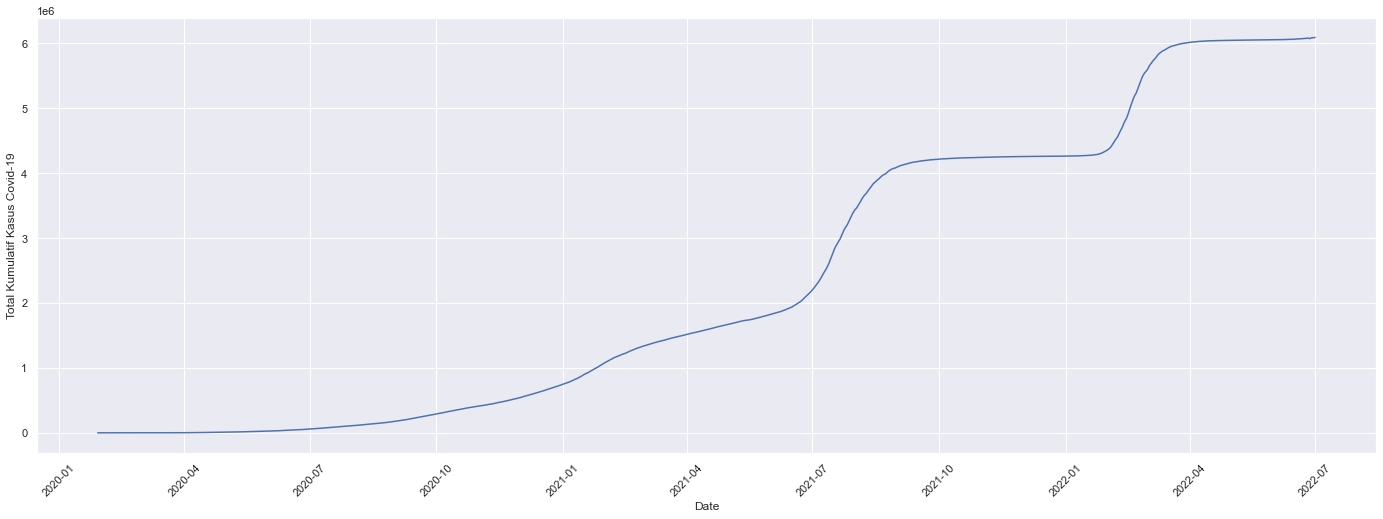

In [28]:
sns.set()
plt.figure(figsize=(24,8))
plt.ylabel('Total Kumulatif Kasus Covid-19')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(dataset.index, dataset['Positif'], )
plt.show()

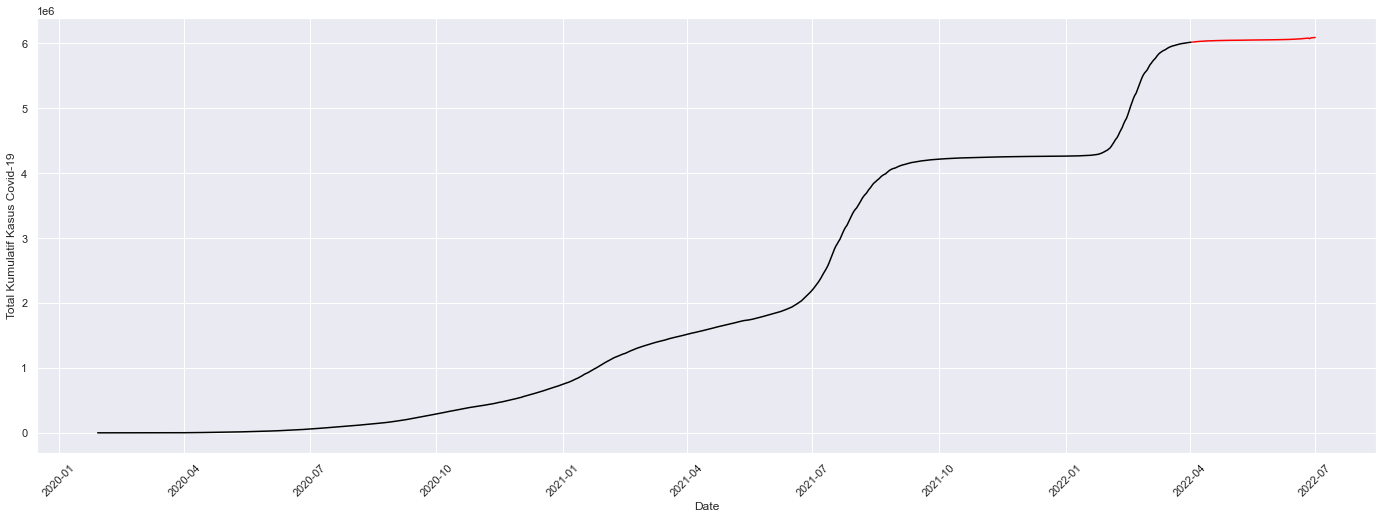

In [29]:
train = dataset.iloc[:len(dataset)-90]
test = dataset.iloc[len(dataset)-90:]

plt.figure(figsize=(24,8))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Total Kumulatif Kasus Covid-19')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginni

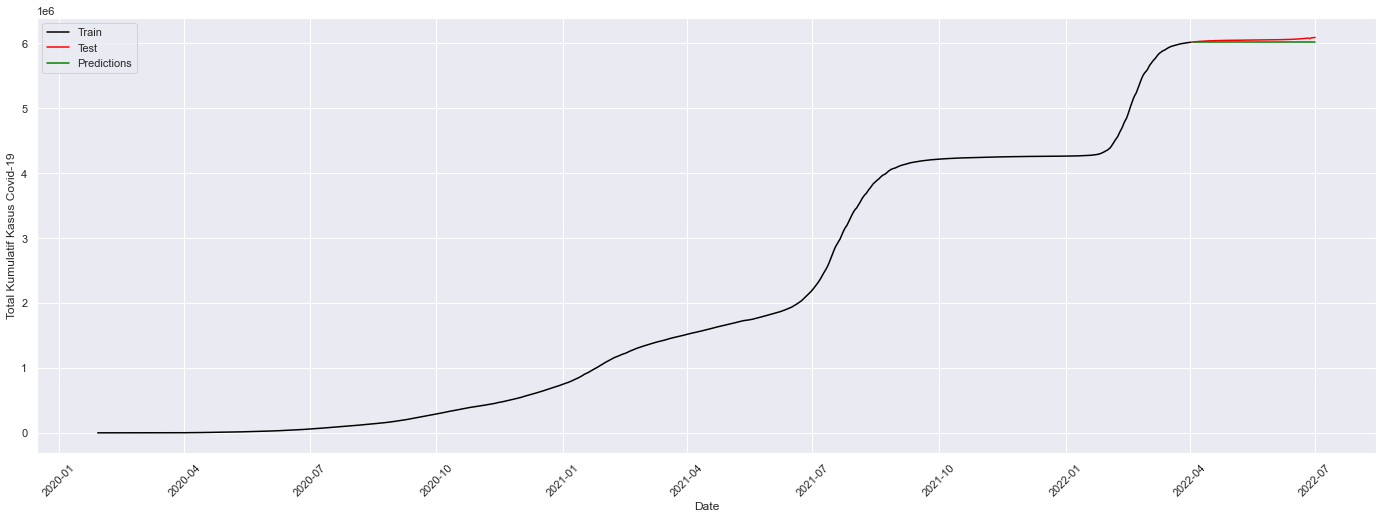

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['Positif']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.figure(figsize=(24,8))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Total Kumulatif Kasus Covid-19')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [31]:
dataset = pd.DataFrame({"Positif" : dataset_ind_jkt["Dirawat (Indonesia)"].values}, index=dataset_ind_jkt["Tanggal"])
dataset

,Positif
Tanggal,
2020-01-29,0.0
2020-03-01,0.0
2020-03-02,2.0
2020-03-03,2.0
2020-03-04,2.0
...,...
2022-06-27,11391.0
2022-06-28,15310.0
2022-06-29,16174.0


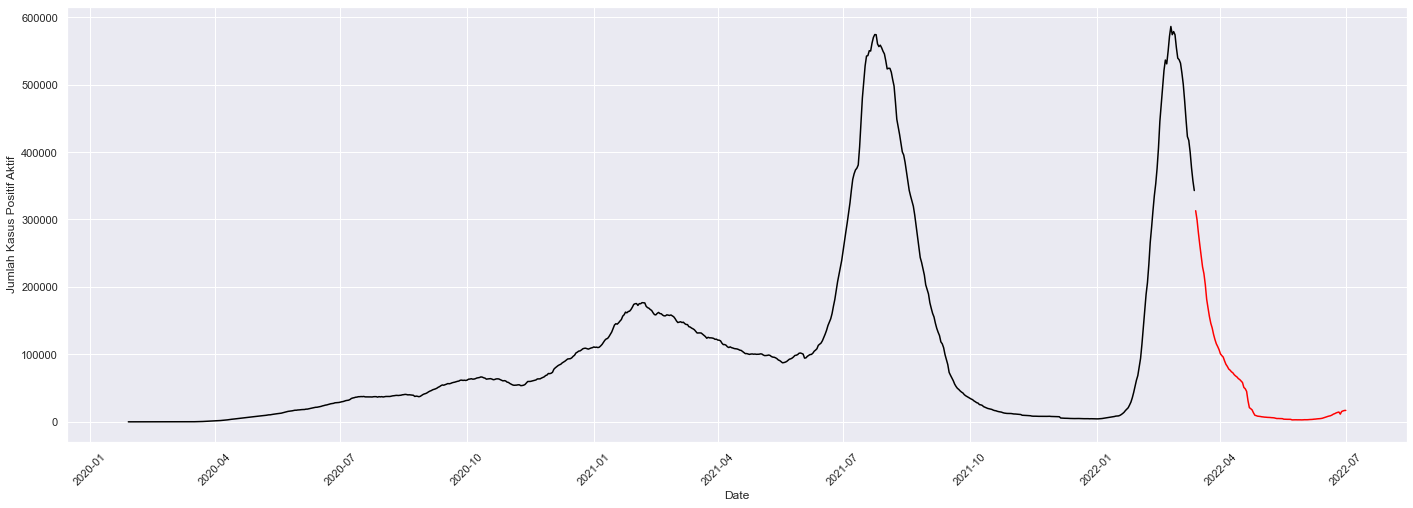

In [32]:
train = dataset.iloc[:len(dataset)-110]
test = dataset.iloc[len(dataset)-110:]

plt.figure(figsize=(24,8))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Jumlah Kasus Positif Aktif')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Syahrul Apriansyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge

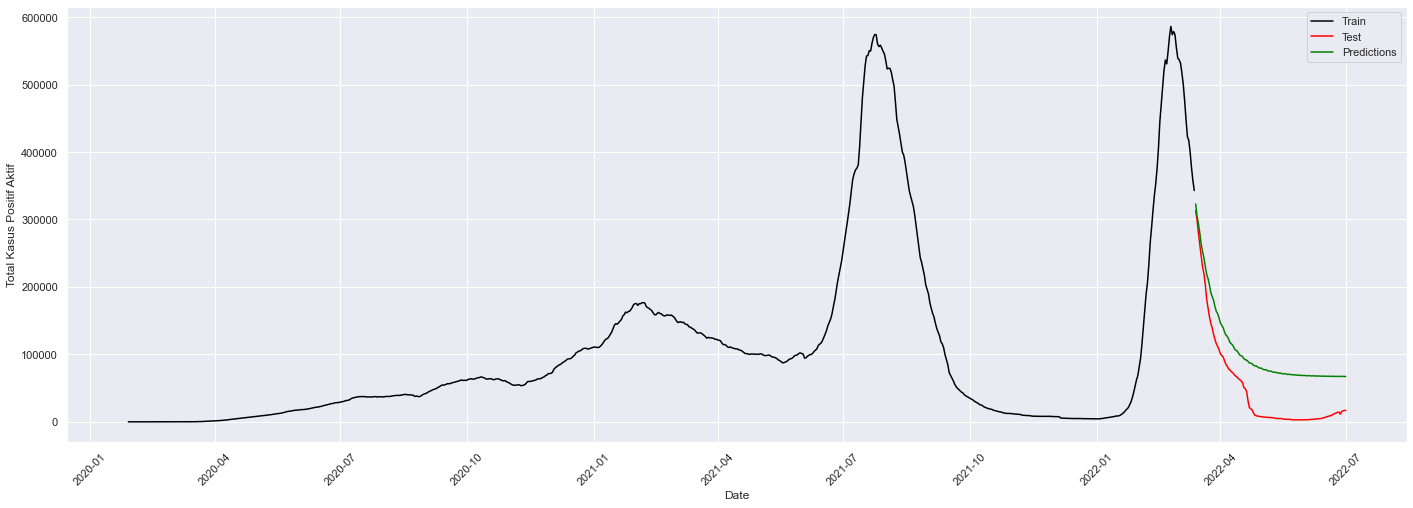

In [36]:
y = train['Positif']
ARMAmodel = SARIMAX(y, order = (3,1,4))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.figure(figsize=(24,8))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Total Kasus Positif Aktif')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Daftar Pustaka

* [Pandas](https://pandas.pydata.org/)
* [Statsmodels](https://www.statsmodels.org/stable/index.html)
* https://builtin.com/data-science/time-series-forecasting-python
* https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
* https://github.com/boedybios/kaggle_explorations/blob/master/belajar_python_pandas/Belajar_Python_Pandas.ipynb
* https://www.geeksforgeeks.org/time-series-data-visualization-in-python/#:~:text=A%20time%20series%20is%20the,equal%20interval%20points%20in%20time.
* https://medium.com/ppl-d7-fasilkom-ui/mengenal-time-series-forecasting-647929e16b3f